In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
x_train = np.array([0, 1, 2, 3, 4, 5])
y_train = np.array([0, 0, 0, 1, 1, 1])


In [3]:
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])


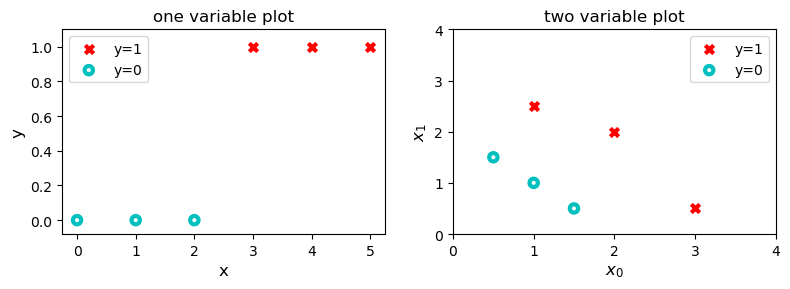

In [4]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

pos = y_train == 1
neg = y_train == 0

ax[0].scatter(x_train[pos], y_train[pos], marker='x', c = 'r', label="y=1", lw=3)
ax[0].scatter(x_train[neg], y_train[neg], marker='o', label="y=0", lw=3, facecolors='none', edgecolors='c')
ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

pos = y_train2 == 1
neg = y_train2 == 0
pos = pos.reshape(-1,)
neg = neg.reshape(-1,)

ax[1].scatter(X_train2[pos, 0], X_train2[pos, 1], marker='x', c = 'r', label='y=1', lw=3)
ax[1].scatter(X_train2[neg, 0], X_train2[neg, 1], marker='o', label='y=0', lw=3, facecolors='none', edgecolors='c')
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()

plt.tight_layout()
plt.show()


In [5]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g


In [6]:
z_tmp = np.arange(-10,11)
y = sigmoid(z_tmp)

print("  input(z)         output(g(z))")
print(np.c_[z_tmp, y])


  input(z)         output(g(z))
[[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]
 [ 1.00000000e+01  9.99954602e-01]]


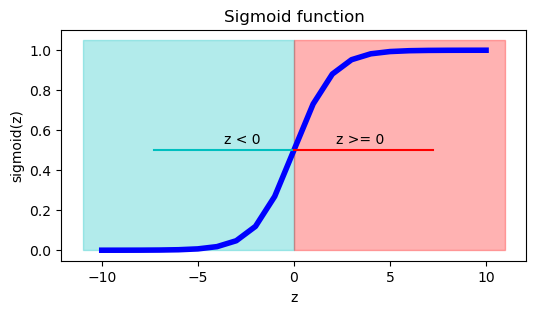

In [7]:
fig,ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(z_tmp, y, c='blue', lw=4)

ylim = ax.get_ylim()
xlim = ax.get_xlim()

ax.fill_between([xlim[0], 0], [ylim[1], ylim[1]], alpha=0.3, color='c')
ax.fill_between([0, xlim[1]], [ylim[1], ylim[1]], alpha=0.3, color='r')

ax.axhline(y=0.5, xmin=0.2, xmax=0.5, c='c')
ax.axhline(y=0.5, xmin=0.5, xmax=0.8, c='r')

ax.annotate("z >= 0", xy= [0,0.5], xytext=[30,5], textcoords='offset points')
ax.annotate("z < 0", xy= [0,0.5], xytext=[-50,5], textcoords='offset points')

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

plt.show()


In [8]:
def gradient_descent_single(X, y, alpha=1e-2, num_iters=10000): 
    m = X.shape[0]
    J_history = []
    w, b = 0., 0.
    dj_dw, dj_db = 0., 0.
    
    for i in range(num_iters):
        for i in range(m):
            f_wb_i = sigmoid(np.dot(X[i],w) + b)
            err_i  = f_wb_i  - y[i]
            dj_dw = dj_dw + err_i * X[i]
            dj_db = dj_db + err_i
        dj_dw = dj_dw/m
        dj_db = dj_db/m   

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        cost = 0.0
        for i in range(m):
            z_i = np.dot(X[i],w) + b
            f_wb_i = sigmoid(z_i)
            cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i) 
        cost = cost / m  
        J_history.append(cost)
        
    return w, b, J_history


In [9]:
w1, b1, J_hist1 = gradient_descent_single(x_train, y_train, num_iters=100000)
print(f"\nupdated parameters: w:{w1}, b:{b1:.3f}")



updated parameters: w:5.434623792274615, b:-13.399


In [10]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


In [11]:
def compute_gradient_logistic(X, y, w, b): 
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_db, dj_dw


In [12]:
def gradient_descent(X, y, alpha=1e-1, num_iters=100000): 
    J_history = []
    w = np.zeros_like(X[0])
    b = 0.
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        if i<1000000: 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        if i% (num_iters / 10) == 0:
            print(f"Iteration {i:6d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history


In [13]:
w, b, J_hist = gradient_descent(X_train2, y_train2, num_iters=500000) 
print(f"\nupdated parameters: w:{w}, b:{b:.3f}")


Iteration      0: Cost 0.684610468560574   
Iteration  50000: Cost 0.003398230224179212   
Iteration 100000: Cost 0.0016974492004651184   
Iteration 150000: Cost 0.0011314144452869933   
Iteration 200000: Cost 0.0008485375637116119   
Iteration 250000: Cost 0.0006788456361230705   
Iteration 300000: Cost 0.0005657273581972536   
Iteration 350000: Cost 0.0004849311257770408   
Iteration 400000: Cost 0.0004243341716252033   
Iteration 450000: Cost 0.00037720266903895584   

updated parameters: w:[10.49636882 10.29556921], b:-28.588


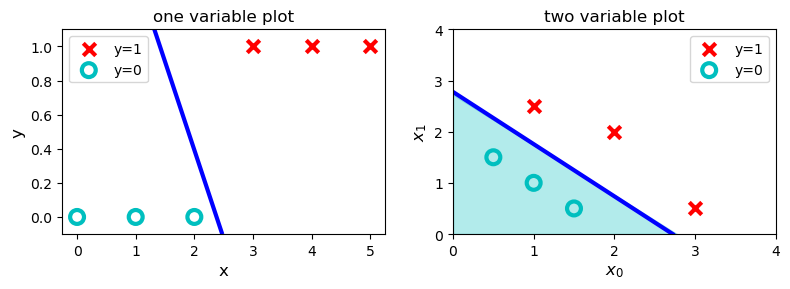

In [14]:
fig,ax = plt.subplots(1,2, figsize=(8,3))

pos = y_train == 1
neg = y_train == 0
x0 = -b1/w1

ax[0].plot([0,x0],[x0,-0.09], c="b", lw=3)
ax[0].scatter(x_train[pos], y_train[pos], marker='x', c = 'r', label="y=1", lw=3, s=80)
ax[0].scatter(x_train[neg], y_train[neg], marker='o', label="y=0", lw=3, s=100, facecolors='none', edgecolors='c')
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

pos = y_train2 == 1
neg = y_train2 == 0
pos = pos.reshape(-1,)
neg = neg.reshape(-1,)
x0 = -b/w[0]
x1 = -b/w[1]

ax[1].plot([0,x0],[x1,0], c="b", lw=3)
ax[1].fill_betweenx([0, x0],[x1,0], color='c', alpha=0.3)

ax[1].scatter(X_train2[pos, 0], X_train2[pos, 1], marker='x', c = 'r', label='y=1', lw=3, s=80)
ax[1].scatter(X_train2[neg, 0], X_train2[neg, 1], marker='o', label='y=0', lw=3, s=100, facecolors='none', edgecolors='c')
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()

plt.tight_layout()
plt.show()
